# The Sakila Database

One of the best example databases out there is the <a href="https://dev.mysql.com/doc/sakila/en/">Sakila Database</a>, which was originally created by MySQL and has been open sourced under the terms of the BSD License.

The Sakila database is a nicely normalised schema modelling a DVD rental store, featuring things like films, actors, film-actor relationships, and a central inventory table that connects films, stores, and rentals.

<img width="1200px" src="https://user-images.githubusercontent.com/7065401/58504872-fa243b00-8161-11e9-85ed-4b7d8d7ce9f7.png" />

## Importing libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

## Loading our data:

In [3]:
conn = sqlite3.connect('data/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

## The data at a glance:

In [4]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [5]:
df.shape

(16044, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [7]:
df.describe()

,rental_date,return_date,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044,15861,16044.000000,16044.00000,16044.000000,16044.000000
mean,2005-07-23 08:12:53.217526912,2005-07-25 23:58:03.138768128,1.506171,4.93549,2.942630,20.215443
min,2005-05-24 22:53:30,2005-05-25 23:55:21,1.000000,3.00000,0.990000,9.990000
25%,2005-07-07 00:58:40.500000,2005-07-10 15:49:36,1.000000,4.00000,0.990000,14.990000
50%,2005-07-28 16:04:32.500000,2005-08-01 19:45:29,2.000000,5.00000,2.990000,20.990000
75%,2005-08-17 21:16:23,2005-08-20 23:35:55,2.000000,6.00000,4.990000,25.990000
max,2006-02-14 15:16:03,2005-09-02 02:35:22,2.000000,7.00000,4.990000,29.990000
std,NaN,NaN,0.499978,1.40169,1.649678,6.081771


## Numerical analysis and visualization

We'll analyze the `film_rental_rate` column:

In [8]:
df['film_rental_rate'].describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

In [9]:
df['film_rental_rate'].mean()

2.9426302667663933

In [10]:
df['film_rental_rate'].median()

2.99

<Axes: >

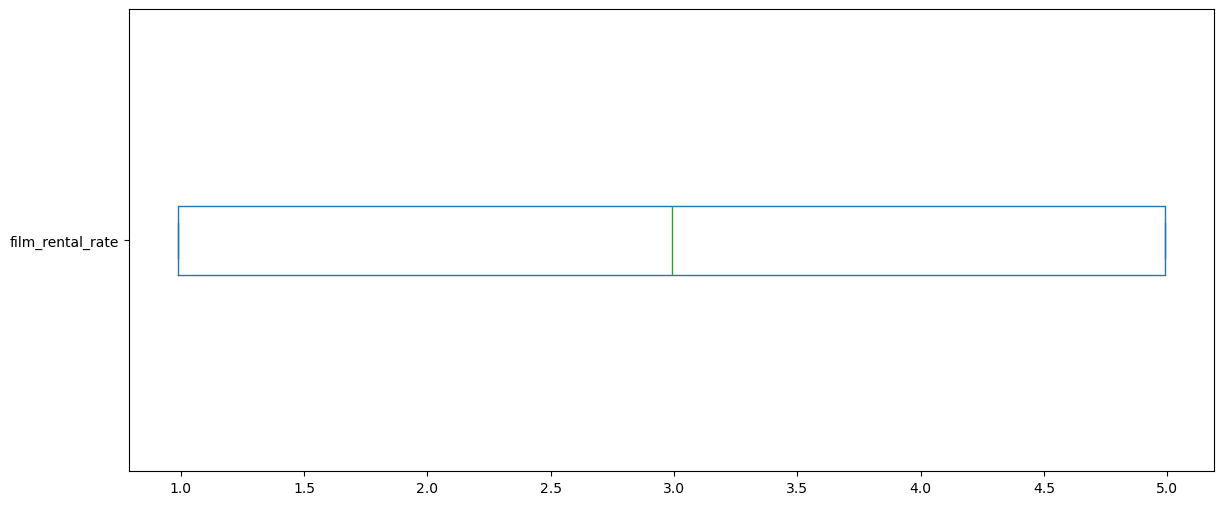

In [11]:
df['film_rental_rate'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: ylabel='Density'>

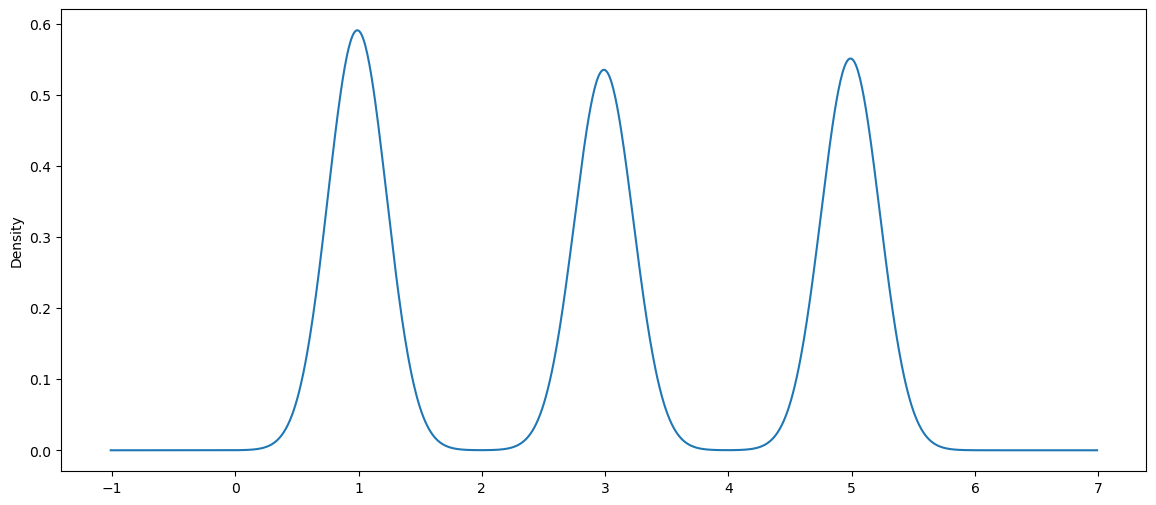

In [12]:
df['film_rental_rate'].plot(kind='density', figsize=(14,6)) # kde

Text(0, 0.5, 'Number of Rentals')

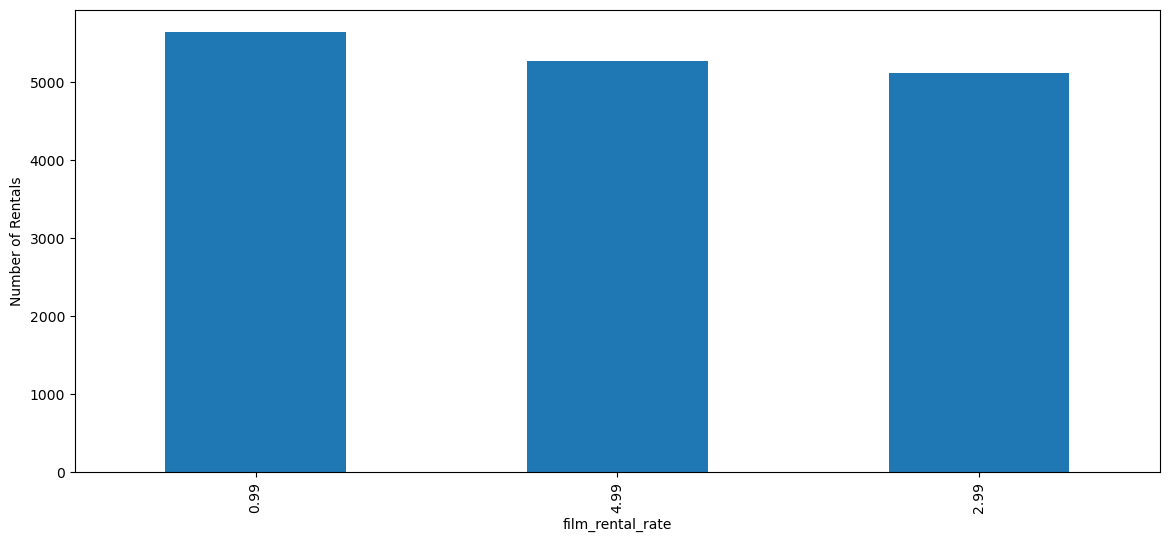

In [13]:
ax = df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Rentals')

## Categorical analysis and visualization

We'll analyze the `rental_store_city` column:

In [14]:
df['rental_store_city'].value_counts()

rental_store_city
Woodridge     8121
Lethbridge    7923
Name: count, dtype: int64

<Axes: ylabel='count'>

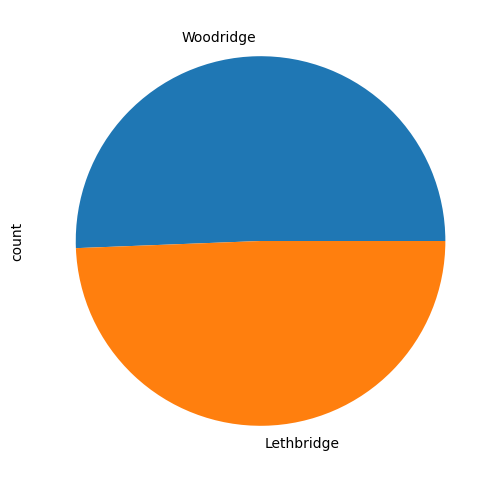

In [15]:
df['rental_store_city'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Rentals')

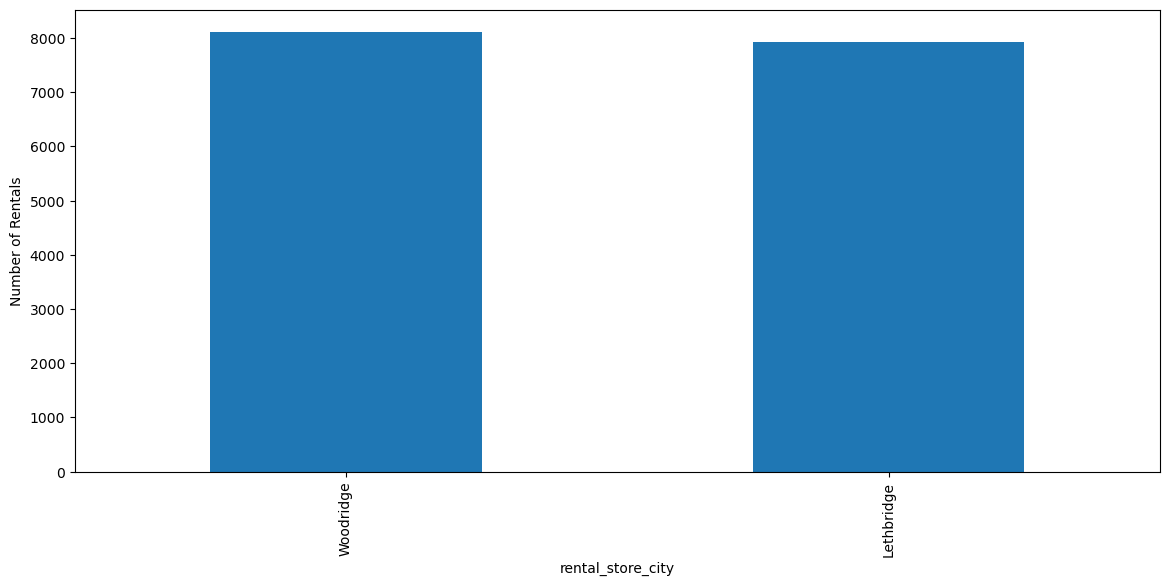

In [16]:
ax = df['rental_store_city'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Rentals')

## Column wrangling

We can also create new columns or modify existing ones.

### Add and calculate a new `rental_rate_return` column

We want to know the rental rate of return of each film. To do that we'll use this formula:

$$ rental\_gain\_return = \frac{film\_rental\_rate}{film\_replacement\_cost} * 100 $$

In [17]:
df['rental_gain_return'] = df['film_rental_rate'] / df['film_replacement_cost'] * 100

df['rental_gain_return'].head()

rental_id
1    13.597090
2    17.598587
3    19.946631
4     4.502046
5     9.969990
Name: rental_gain_return, dtype: float64

<Axes: ylabel='Density'>

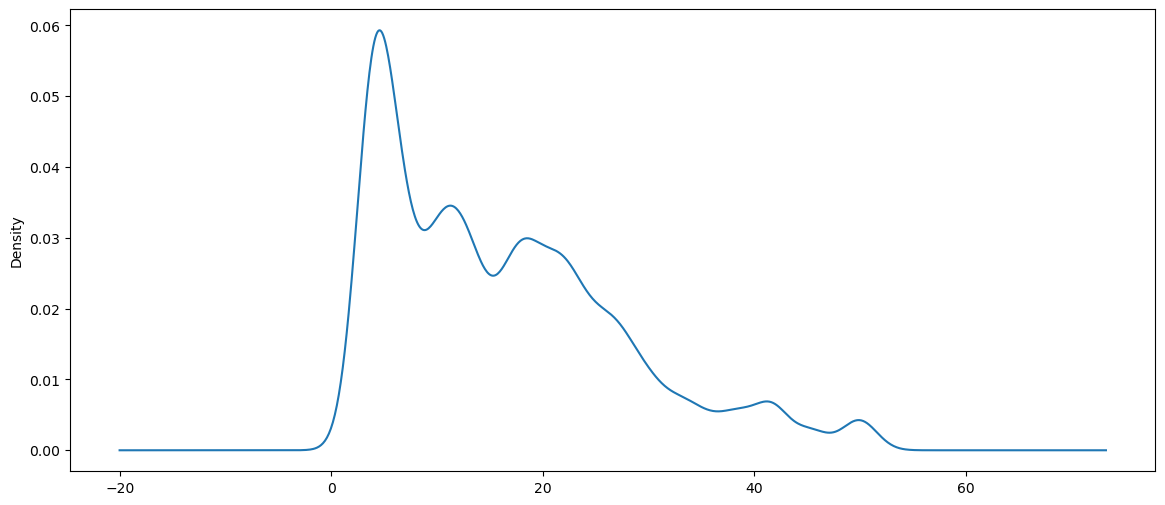

In [18]:
df['rental_gain_return'].plot(kind='density', figsize=(14,6))

In [19]:
df['rental_gain_return'].mean().round(2)

16.34

In [20]:
round(df['rental_gain_return'].median(),2)      # float objects cannot be rounded with .round() method we use round() function instead

13.6

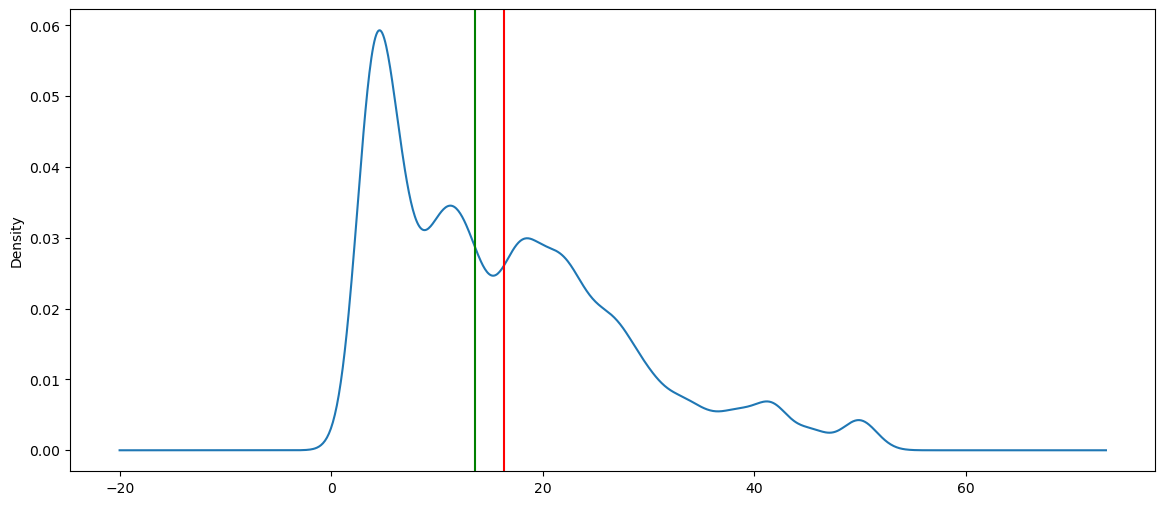

In [21]:
ax = df['rental_gain_return'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(df['rental_gain_return'].mean(), color='red')
ax.axvline(df['rental_gain_return'].median(), color='green')

> Each rental represents <b>13.6%</b> of film cost.

So <b>7.35</b> rentals are needed to recover film market price (`film_replacement_cost`)

In [22]:
100 / 13.6

7.352941176470589

While in average each film is rented <b>16.74</b> times.

In [23]:
df['film_title'].value_counts().mean()

16.747390396659707

## Selection & Indexing:

### Get the rental records of the customer with lastname `HANSEN`

In [24]:
df.loc[df['customer_lastname'] == 'HANSEN']

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990
134,2005-05-25 21:48:41,2005-06-02 18:28:41,HANSEN,2,Woodridge,JUMPING WRATH,4,0.99,18.99,NC-17,5.213270
416,2005-05-27 15:02:10,2005-05-29 10:34:10,HANSEN,2,Woodridge,LESSON CLEOPATRA,3,0.99,28.99,NC-17,3.414971
809,2005-05-29 19:10:20,2005-06-05 19:05:20,HANSEN,2,Woodridge,INDIAN LOVE,4,0.99,26.99,NC-17,3.668025
1006,2005-05-31 00:57:08,2005-06-02 22:35:08,HANSEN,2,Woodridge,SALUTE APOLLO,4,2.99,29.99,R,9.969990
1368,2005-06-15 14:27:47,2005-06-23 18:07:47,HANSEN,1,Lethbridge,HUNCHBACK IMPOSSIBLE,4,4.99,28.99,PG-13,17.212832
2603,2005-06-19 06:21:25,2005-06-26 03:19:25,HANSEN,2,Woodridge,CAT CONEHEADS,5,4.99,14.99,G,33.288859
5209,2005-07-09 11:22:39,2005-07-17 09:31:39,HANSEN,1,Lethbridge,WHALE BIKINI,4,4.99,11.99,PG-13,41.618015
5266,2005-07-09 14:17:40,2005-07-16 10:42:40,HANSEN,2,Woodridge,LOATHING LEGALLY,4,0.99,29.99,R,3.301100


### Create a list of all the films with the highest replacement cost

In [25]:
df['film_replacement_cost'].max()

29.99

In [26]:
df.loc[df['film_replacement_cost'] == df['film_replacement_cost'].max(), 'film_title'].unique()

array(['IDOLS SNATCHERS', 'LAWLESS VISION', 'SONG HEDWIG',
       'LOATHING LEGALLY', 'PATIENT SISTER', 'RESERVOIR ADAPTATION',
       'JEEPERS WEDDING', 'GOLDFINGER SENSIBILITY', 'CHARIOTS CONSPIRACY',
       'HONEY TIES', 'GRAFFITI LOVE', 'SLACKER LIAISONS', 'DIRTY ACE',
       'BLINDNESS GUN', 'WYOMING STORM', 'FEUD FROGMEN', 'SALUTE APOLLO',
       'JINGLE SAGEBRUSH', 'HILLS NEIGHBORS', 'UNCUT SUICIDES',
       'EVERYONE CRAFT', 'FLATLINERS KILLER', 'BALLROOM MOCKINGBIRD',
       'RIVER OUTLAW', 'ARABIA DOGMA', 'VIRGIN DAISY', 'JERICHO MULAN',
       'SASSY PACKER', 'TRACY CIDER', 'LOVER TRUMAN', 'DOCTOR GRAIL',
       'GILMORE BOILED', 'PRINCESS GIANT', 'CRUELTY UNFORGIVEN',
       'REIGN GENTLEMEN', 'WEST LION', 'BONNIE HOLOCAUST', 'EARTH VISION',
       'RANDOM GO', 'CLOCKWORK PARADISE', 'FANTASIA PARK', 'RIGHT CRANES',
       'CUPBOARD SINNERS', 'OSCAR GOLD', 'SMILE EARRING',
       'HOLLYWOOD ANONYMOUS', 'POSEIDON FOREVER',
       'EXTRAORDINARY CONQUERER', 'QUEST MUSSOLINI', 

### How many `PG` or `PG-13` rating films were rented?

In [27]:
df.loc[(df['film_rating'] == 'PG') | (df['film_rating'] == 'PG-13')].shape[0]

6797

### What's the mean of `film_rental_duration`?

In [28]:
df['film_rental_duration'].mean()

4.935489902767389

### What's the most common rental duration?

Show a <b>bar plot</b> with all the durations.

In [38]:
df['film_rental_duration'].value_counts()

film_rental_duration
3    3412
6    3392
4    3251
5    3165
7    2824
Name: count, dtype: int64

Text(0, 0.5, 'film rental duration')

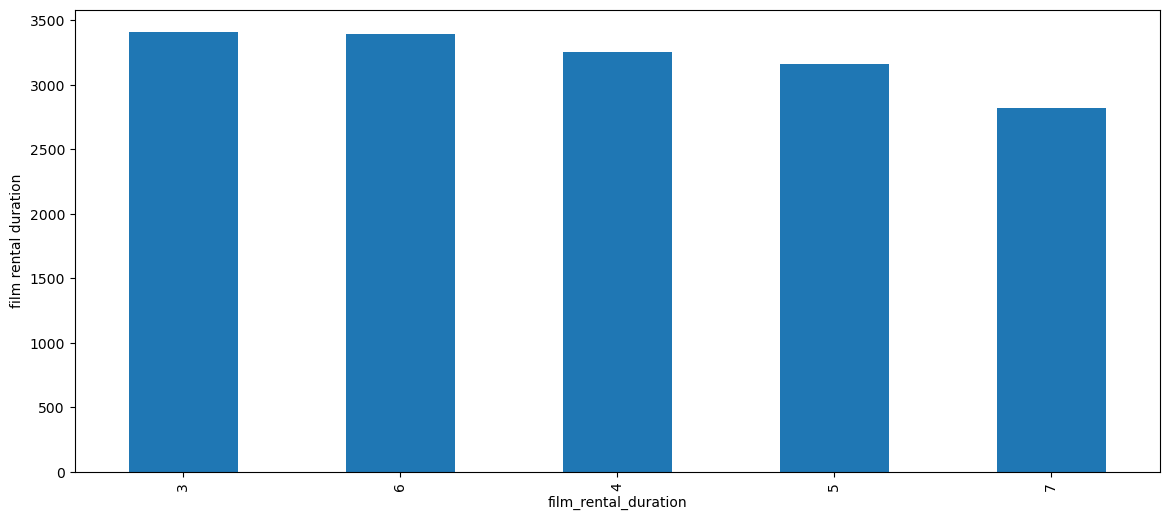

In [39]:
ax = df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('film rental duration')

### What is the most common rental rate?

<Axes: ylabel='count'>

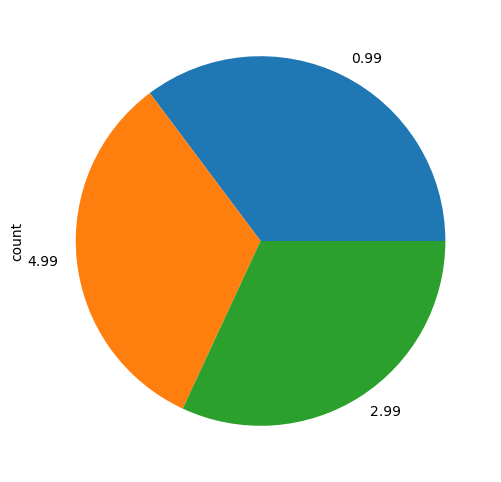

In [41]:
df['film_rental_rate'].value_counts().plot(kind='pie', figsize=(6,6))


Text(0, 0.5, 'film rental rate')

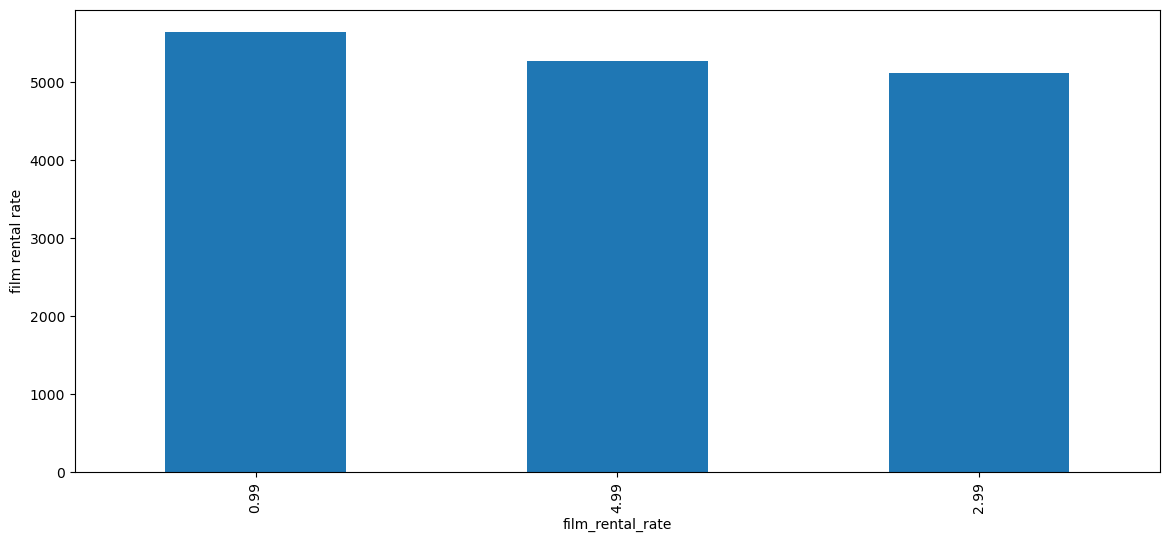

In [42]:
ax = df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('film rental rate')


### How is the replacement cost distributed?

- Drawing a box plot of the replacement costs.
- Drawing a density plot of the replacement costs.
- Adding a red line on the <b>mean</b>.
- Adding a green line on the median <b>median</b>.

<Axes: >

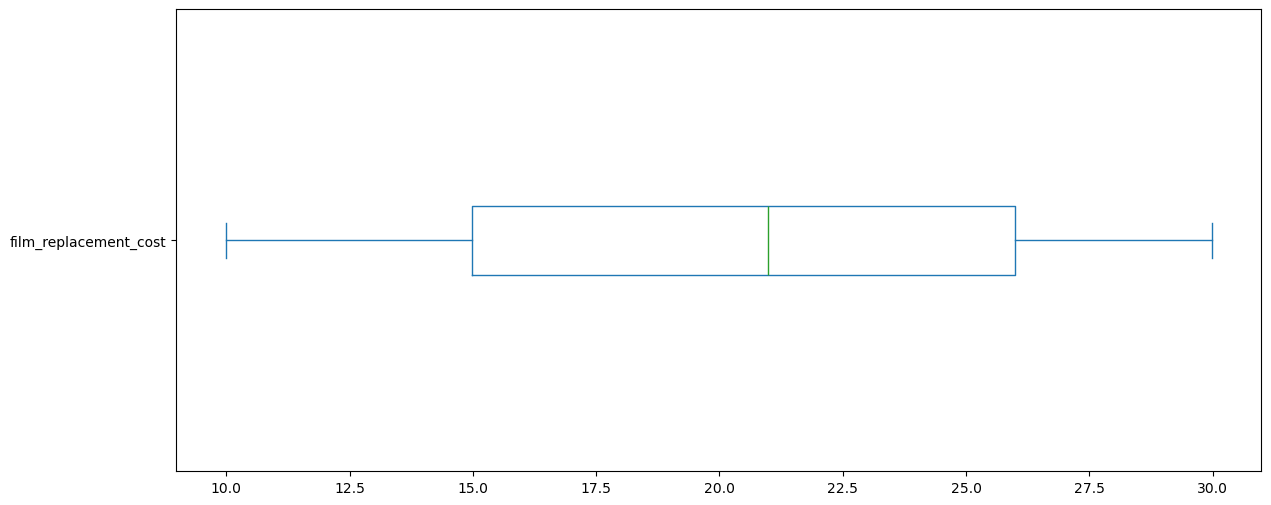

In [43]:
df['film_replacement_cost'].plot(kind='box', vert=False, figsize=(14,6))


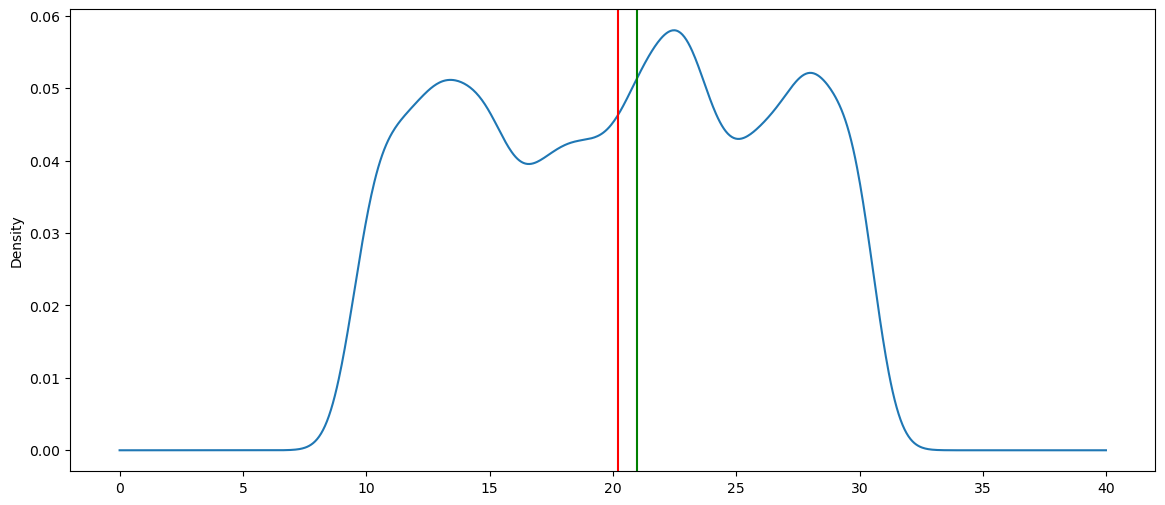

In [46]:
ax = df['film_replacement_cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(df['film_replacement_cost'].mean(), color='red')
ax.axvline(df['film_replacement_cost'].median(), color='green')


### How many films of each rating do we have?

- Showing the raw count of each film rating.
- Showing a <b>bar plot</b> with all possible film ratings.

In [47]:
# your code goes here
df['film_rating'].value_counts()

film_rating
PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: count, dtype: int64

<Axes: xlabel='film_rating'>

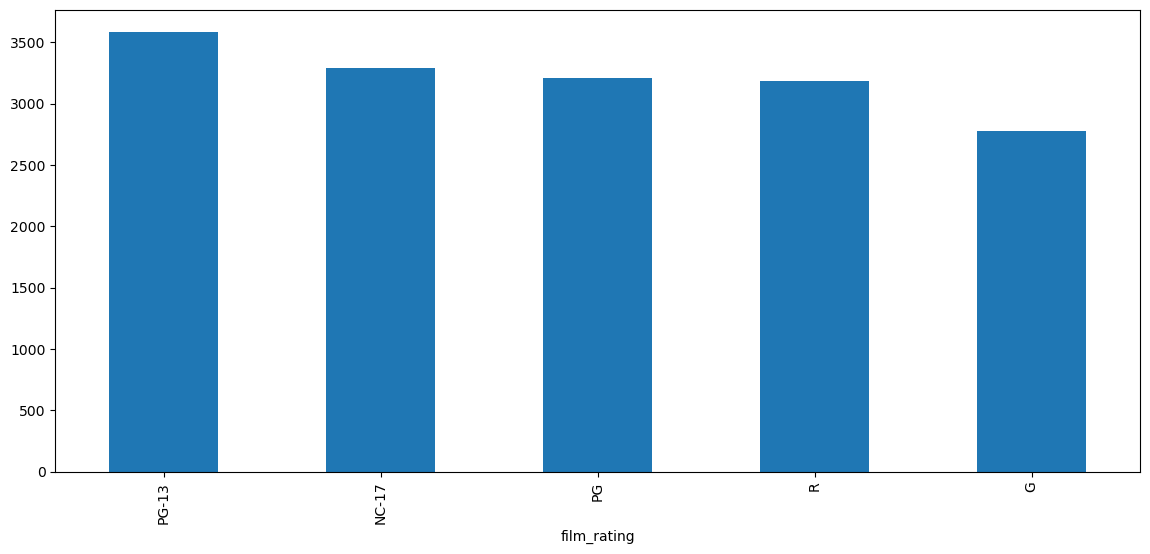

In [48]:
# your code goes here
df['film_rating'].value_counts().plot(kind='bar', figsize=(14,6))

### Does the film replacement cost vary depending on film rating?

In the United States, film classification is a voluntary process with the ratings issued by the Motion Picture Association of America (MPAA) via the Classification and Rating Administration (CARA).

- G (General Audiences): All Ages are Admitted.
- PG (Parental Guidance Suggested): Some Material May Not Be Suitable for Children.
- PG-13 (Parents Strongly Cautioned): Some Material May Be Inappropriate for Children Under 13.
- R (Restricted): Under 17 Requires Accompanying Parent or Adult Guardian.
- NC-17 (Adults Only): No One 17 and Under Admitted.

Show a <b>grouped box plot</b> per film rating with the film replacement costs.

In [63]:
ax = df.groupby('film_rating')['film_replacement_cost'].mean()
ax

film_rating
G        20.423105
NC-17    20.202572
PG       19.281407
PG-13    20.711618
R        20.431685
Name: film_replacement_cost, dtype: float64

<Axes: title={'center': 'film_replacement_cost'}, xlabel='film_rating'>

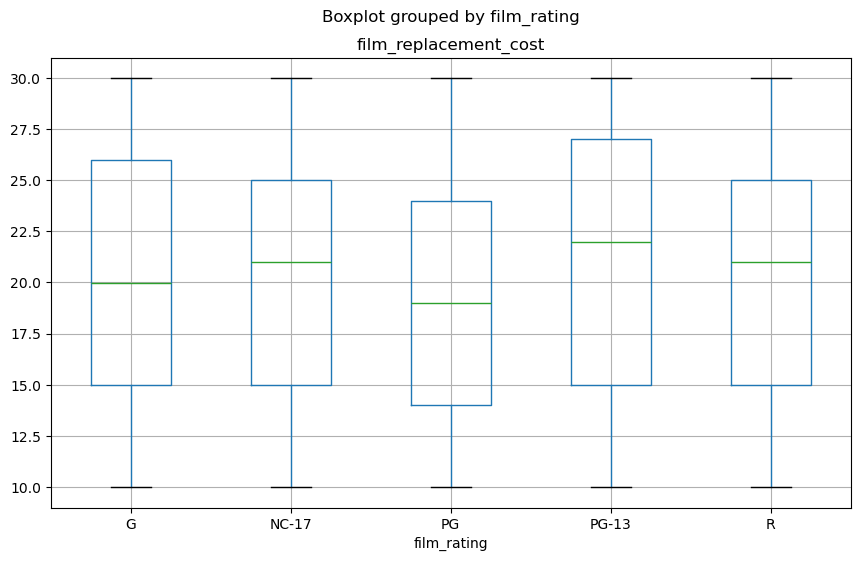

In [78]:
df.boxplot(column='film_replacement_cost', by='film_rating', figsize=(10, 6))

### Adding a new `rental_days` column

This numeric column has the count of days between `rental_date` and `return_date`.

In [82]:
df['rental_days'] = df['return_date'] - df['rental_date']
df['rental_days'] = df['rental_days'].dt.days
df['rental_days']


rental_id
1        1.0
2        3.0
3        7.0
4        9.0
5        8.0
        ... 
16045    2.0
16046    3.0
16047    1.0
16048    7.0
16049    6.0
Name: rental_days, Length: 16044, dtype: float64

### Analyzing the distribution of `rental_days`

- Calculating the mean of `rental_days`.
- Showing a <b>density (KDE)</b> of `rental_days`.

In [84]:
df['rental_days'].mean()

4.525944139713763

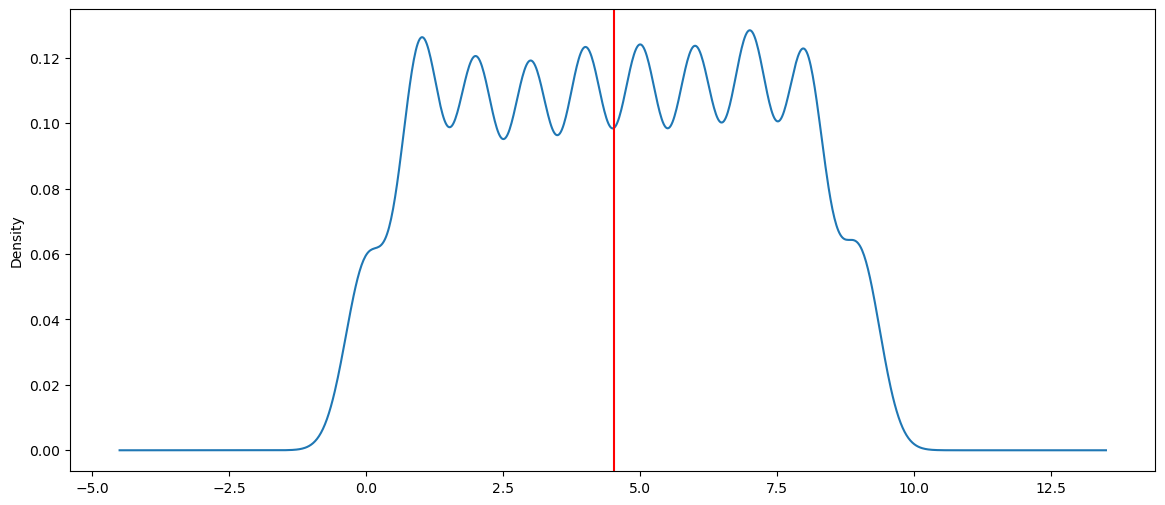

In [88]:
ax = df['rental_days'].plot(kind='density', figsize=(14,6))
ax.axvline(df['rental_days'].mean(), color='red')


### Adding a new `film_daily_rental_rate` column

This value should be the division of `film_rental_rate` by `film_rental_duration`.

In [91]:
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']
df['film_daily_rental_rate']

rental_id
1        0.427143
2        0.427143
3        0.427143
4        0.165000
5        0.598000
           ...   
16045    0.198000
16046    0.165000
16047    0.247500
16048    1.247500
16049    0.247500
Name: film_daily_rental_rate, Length: 16044, dtype: float64

### Analyzing the distribution of `film_daily_rental_rate`

- Calculating the mean of `film_daily_rental_rate`.
- Showing a <b>density (KDE)</b> of `film_daily_rental_rate`.

In [93]:
df['film_daily_rental_rate'].mean()


0.6458262471655329

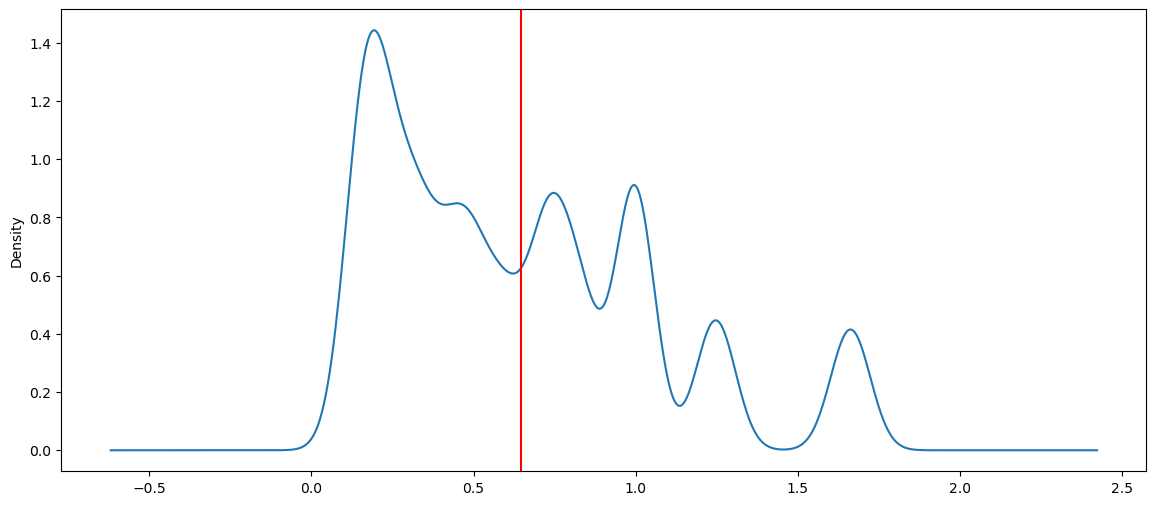

In [94]:
ax = df['film_daily_rental_rate'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_daily_rental_rate'].mean(), color='red')



### Listing 10 films with the lowest daily rental rate

In [101]:
df.sort_values(by='film_daily_rental_rate').head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
14877,2005-08-22 03:39:56,2005-08-24 03:41:56,HERRERA,1,Lethbridge,DECEIVER BETRAYED,7,0.99,22.99,NC-17,4.306220,2.0,0.141429
5734,2005-07-10 11:37:28,2005-07-16 11:10:28,BOWENS,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,4.306220,5.0,0.141429
11899,2005-08-17 15:29:12,2005-08-24 17:41:12,PERRY,2,Woodridge,PRIMARY GLASS,7,0.99,16.99,G,5.826957,7.0,0.141429
4210,2005-07-07 11:36:20,2005-07-16 12:38:20,WOFFORD,2,Woodridge,HOOK CHARIOTS,7,0.99,23.99,G,4.126719,9.0,0.141429
7215,2005-07-27 09:24:00,2005-08-05 07:37:00,OLIVARES,2,Woodridge,MOON BUNCH,7,0.99,20.99,PG,4.716532,8.0,0.141429
1268,2005-06-15 07:29:30,2005-06-23 12:36:30,BURNS,1,Lethbridge,SIEGE MADRE,7,0.99,23.99,R,4.126719,8.0,0.141429
7229,2005-07-27 10:00:54,2005-07-28 13:58:54,LANE,2,Woodridge,DECEIVER BETRAYED,7,0.99,22.99,NC-17,4.306220,1.0,0.141429
7231,2005-07-27 10:01:51,2005-08-05 13:38:51,LONG,2,Woodridge,GILBERT PELICAN,7,0.99,13.99,G,7.076483,9.0,0.141429
7235,2005-07-27 10:09:30,2005-08-05 11:44:30,NGO,1,Lethbridge,EMPIRE MALKOVICH,7,0.99,26.99,G,3.668025,9.0,0.141429


### Listing 10 films with the highest daily rental rate

In [105]:
df.sort_values(by='film_daily_rental_rate').tail(10)


,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,,
7874,2005-07-28 10:21:52,2005-08-06 16:19:52,LONG,1,Lethbridge,PANIC CLUB,3,4.99,15.99,G,31.207004,9.0,1.663333
1413,2005-06-15 17:25:07,2005-06-21 17:17:07,ALEXANDER,2,Woodridge,SHOW LORD,3,4.99,24.99,PG-13,19.967987,5.0,1.663333
13894,2005-08-20 15:55:20,2005-08-26 17:26:20,MADRIGAL,2,Woodridge,MINE TITANS,3,4.99,12.99,PG-13,38.414165,6.0,1.663333
13891,2005-08-20 15:42:05,2005-08-25 13:26:05,RODRIQUEZ,1,Lethbridge,HUSTLER PARTY,3,4.99,22.99,NC-17,21.705089,4.0,1.663333
7876,2005-07-28 10:24:22,2005-08-04 07:15:22,MALCOLM,2,Woodridge,SECRETS PARADISE,3,4.99,24.99,G,19.967987,6.0,1.663333
13880,2005-08-20 15:18:20,2005-08-24 18:03:20,SOTO,1,Lethbridge,STRANGER STRANGERS,3,4.99,12.99,G,38.414165,4.0,1.663333
5262,2005-07-09 14:08:01,2005-07-12 16:48:01,WELCH,2,Woodridge,DOORS PRESIDENT,3,4.99,22.99,NC-17,21.705089,3.0,1.663333
7884,2005-07-28 10:37:24,2005-07-31 10:31:24,CORNWELL,2,Woodridge,STING PERSONAL,3,4.99,9.99,NC-17,49.949950,2.0,1.663333
3628,2005-07-06 06:19:43,2005-07-07 02:23:43,OCAMPO,1,Lethbridge,SCARFACE BANG,3,4.99,11.99,PG-13,41.618015,0.0,1.663333


### How many rentals were made in Lethbridge city?

In [108]:
len(df[df['rental_store_city'] == 'Lethbridge'])


7923

### How many rentals of each film rating were made in Lethbridge city?

Show a <b>bar plot</b> with each film rating count.

In [118]:
df[df['rental_store_city'] == 'Lethbridge'].value_counts('film_rating')


film_rating
PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: count, dtype: int64

<Axes: xlabel='film_rating'>

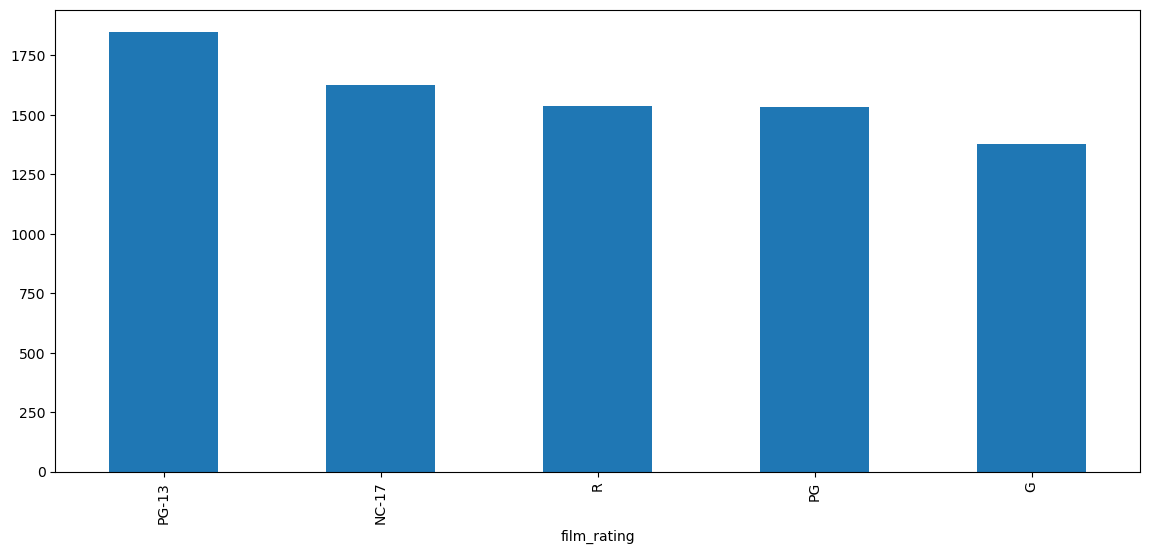

In [119]:
df[df['rental_store_city'] == 'Lethbridge'].value_counts('film_rating').plot(kind='bar', figsize=(14,6))

### How many rentals were made in Woodridge city with rental duration higher than 5 days?

In [129]:
len(df[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)])


3186

### How many rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD?

In [130]:
len(df[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)])


8444

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)